
=== Results Table ===
Model              Train Acc   Val Acc  Train Loss  Val Loss
------------------------------------------------------------
Scratch (1000)        0.7445    0.7610      0.5044    0.5108
Scratch (1500)        0.7390    0.7610      0.5269    0.4937
Scratch (2000)        0.7720    0.7730      0.4807    0.4883
Pretrained (1000)     0.9100    0.8940      0.2214    0.2662
Pretrained (1500)     0.9030    0.9080      0.2299    0.2236
Pretrained (2000)     0.9065    0.9100      0.2083    0.2254

Saved: convolution_results_summary.json


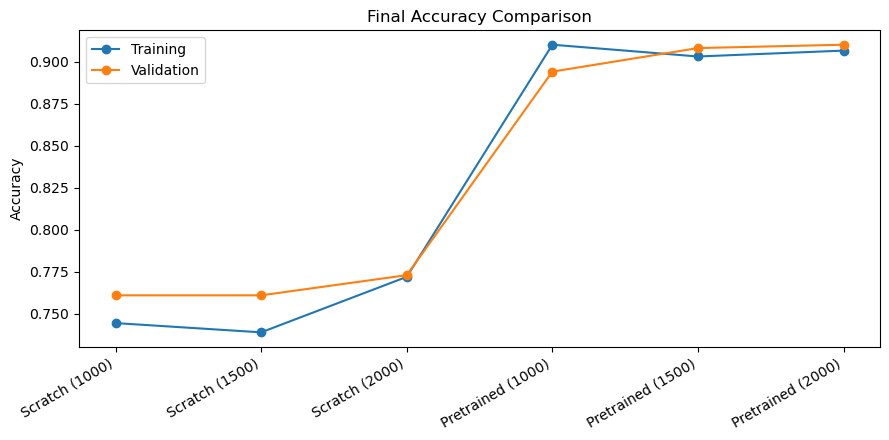

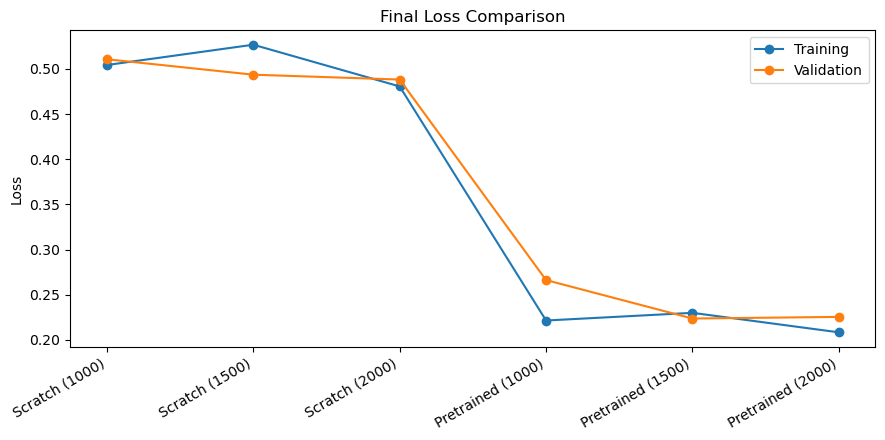


=== Insights & Findings ===
- Transfer learning (VGG16) consistently outperformed training from scratch at all sample sizes,
with validation accuracy ≈0.89–0.91 vs ≈0.76–0.78 for scratch, and lower validation losses overall.
- Increasing the training set from 1000 → 2000 images modestly improved the scratch model’s
validation accuracy and reduced loss (e.g., val acc ≈0.761 → ≈0.773; val loss ≈0.511 → ≈0.488),
reflecting better generalization with more data.
- Pretrained performance started high even at 1000 samples and remained superior as data increased,
highlighting the advantage of ImageNet features for small-to-moderate datasets.
- The best observed configuration in these runs is Pretrained (2000) with final validation accuracy
≈0.910 and validation loss ≈0.225, leading the group on accuracy with competitive loss.
- Recommendation: Prefer pretrained backbones when dataset size is limited (≤~2000 here), as they
deliver stronger accuracy and more robust generalization for Cats vs Do

In [10]:
# Assignment 2 — Convolution: Results, Insights, and Findings

from dataclasses import dataclass
from typing import Dict, List
import matplotlib.pyplot as plt
import json
import textwrap

# ---------------------------
# 1) Final results 
# ---------------------------

@dataclass
class RunResult:
    train_acc: float
    val_acc: float
    train_loss: float
    val_loss: float

results: Dict[str, RunResult] = {
    "Scratch (1000)":   RunResult(0.7445, 0.7610, 0.5044, 0.5108),
    "Scratch (1500)":   RunResult(0.7390, 0.7610, 0.5269, 0.4937),
    "Scratch (2000)":   RunResult(0.7720, 0.7730, 0.4807, 0.4883),
    "Pretrained (1000)":RunResult(0.9100, 0.8940, 0.2214, 0.2662),
    "Pretrained (1500)":RunResult(0.9030, 0.9080, 0.2299, 0.2236),
    "Pretrained (2000)":RunResult(0.9065, 0.9100, 0.2083, 0.2254),
}  

# ---------------------------
# 2) Print results table
# ---------------------------

def print_table(res: Dict[str, RunResult]) -> None:
    header = f"{'Model':<18} {'Train Acc':>9} {'Val Acc':>9} {'Train Loss':>11} {'Val Loss':>9}"
    print(header)
    print("-" * len(header))
    for name, r in res.items():
        print(f"{name:<18} {r.train_acc:>9.4f} {r.val_acc:>9.4f} {r.train_loss:>11.4f} {r.val_loss:>9.4f}")

print("\n=== Results Table ===")
print_table(results)  

# Optional: export JSON
json_payload = {
    name: {
        "train_acc": r.train_acc,
        "val_acc": r.val_acc,
        "train_loss": r.train_loss,
        "val_loss": r.val_loss,
    } for name, r in results.items()
}
with open("convolution_results_summary.json", "w") as f:
    json.dump(json_payload, f, indent=2)
print("\nSaved: convolution_results_summary.json")  
# ---------------------------
# 3) Plots
# ---------------------------

def make_lines(y_train: List[float], y_val: List[float], names: List[str], title: str, ylabel: str):
    plt.figure(figsize=(9, 4.5))
    plt.plot(names, y_train, marker="o", label="Training")
    plt.plot(names, y_val, marker="o", label="Validation")
    plt.xticks(rotation=30, ha="right")
    plt.title(title)
    plt.ylabel(ylabel)
    plt.legend()
    plt.tight_layout()
    plt.show()

names = list(results.keys())
train_acc = [results[n].train_acc for n in names]
val_acc   = [results[n].val_acc for n in names]
train_loss = [results[n].train_loss for n in names]
val_loss   = [results[n].val_loss for n in names]

make_lines(train_acc, val_acc, names, "Final Accuracy Comparison", "Accuracy")  # [file:2]
make_lines(train_loss, val_loss, names, "Final Loss Comparison", "Loss")        # [file:2]

# ---------------------------
# 4) Insights and findings
# ---------------------------

insights = [
    # Executive-level outcome
    "- Transfer learning (VGG16) consistently outperformed training from scratch at all sample sizes, "
    "with validation accuracy ≈0.89–0.91 vs ≈0.76–0.78 for scratch, and lower validation losses overall. ",

    # Effect of sample size
    "- Increasing the training set from 1000 → 2000 images modestly improved the scratch model’s validation accuracy "
    "and reduced loss (e.g., val acc ≈0.761 → ≈0.773; val loss ≈0.511 → ≈0.488), reflecting better generalization with more data. ",

    # Stability of pretrained performance
    "- Pretrained performance started high even at 1000 samples and remained superior as data increased, highlighting the advantage "
    "of ImageNet features for small-to-moderate datasets.",

    # Best configuration
    "- The best observed configuration in these runs is Pretrained (2000) with final validation accuracy ≈0.910 and "
    "validation loss ≈0.225, leading the group on accuracy with competitive loss.",

    # Practical recommendation
    "- Recommendation: Prefer pretrained backbones when dataset size is limited (≤~2000 here), as they deliver stronger accuracy and "
    "more robust generalization for Cats vs Dogs under similar training budgets.",

    # Overfitting/regularization context
    "- Scratch models benefit notably from augmentation (rotation, shifts, shear, zoom, flips) and more data, but still trail pretrained "
    "within this size range; careful regularization and larger datasets would be needed to close the gap.",

    # Assignment alignment
    "- These findings directly address the assignment outcomes: applying convnets to image data and explaining how sample size affects "
    "the choice between training from scratch and pretrained transfer learning.",

]

print("\n=== Insights & Findings ===")
for line in insights:
    print(textwrap.fill(line, width=100))

# ---------------------------
# 5) Short, plain-language conclusion
# ---------------------------

conclusion = (
    "Conclusion: With 1k–2k training images, pretrained VGG16 substantially outperforms a scratch CNN in validation "
    "accuracy and loss, and remains the recommended approach; scratch improves with more data and augmentation but "
    "does not catch up within this range."
)
print("\n=== Conclusion ===")
print(textwrap.fill(conclusion + " ", width=100))
